In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.dummy import DummyClassifier
from sklearn.metrics import cohen_kappa_score

#### Question 1
Scikit-learn's trees are used. <br>
The implemetation of these trees are clsoer to CART than C4.5, however we use them for C4.5 as well. <br>
A tree of type CART will be a scikit-learn's tree with the gini criterion, and a type C4.5 tree will have the entropy criterion.

#### Loading of data

In [2]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic.head(3)

,class,age,sex,survived
0,1st,adult,male,yes
1,1st,adult,male,yes
2,1st,adult,male,yes


#### Preprocessing of data
Scikit-learn is unable to deal with categorical data, hence data is converted to numerical values.

In [3]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(np.unique(df_titanic.values))
df_titanic_encoded = pd.DataFrame({x:label_encoder.transform(df_titanic[x]) for x in df_titanic.columns.values})
df_titanic_encoded.head(3)

LabelEncoder()

,class,age,sex,survived
0,0,3,7,9
1,0,3,7,9
2,0,3,7,9


#### Creation of features matrice X et target vector y

In [4]:
X_titanic = df_titanic_encoded[['class', 'age', 'sex']]
y_titanic = df_titanic_encoded[['survived']]
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=1)
print(f'Number of training instances: {len(X_train_titanic)}.\nNumber of testing instances: {len(X_test_titanic)}')

Number of training instances: 1760.
Number of testing instances: 441


#### Initialization et training of trees

In [5]:
tree_CART_titanic = DecisionTreeClassifier(criterion='gini')
tree_C45_titanic = DecisionTreeClassifier(criterion='entropy')

tree_CART_titanic.fit(X_train_titanic, y_train_titanic)
tree_C45_titanic.fit(X_train_titanic, y_train_titanic)

DecisionTreeClassifier()

DecisionTreeClassifier(criterion='entropy')

#### Visualization of trees
> CART

True

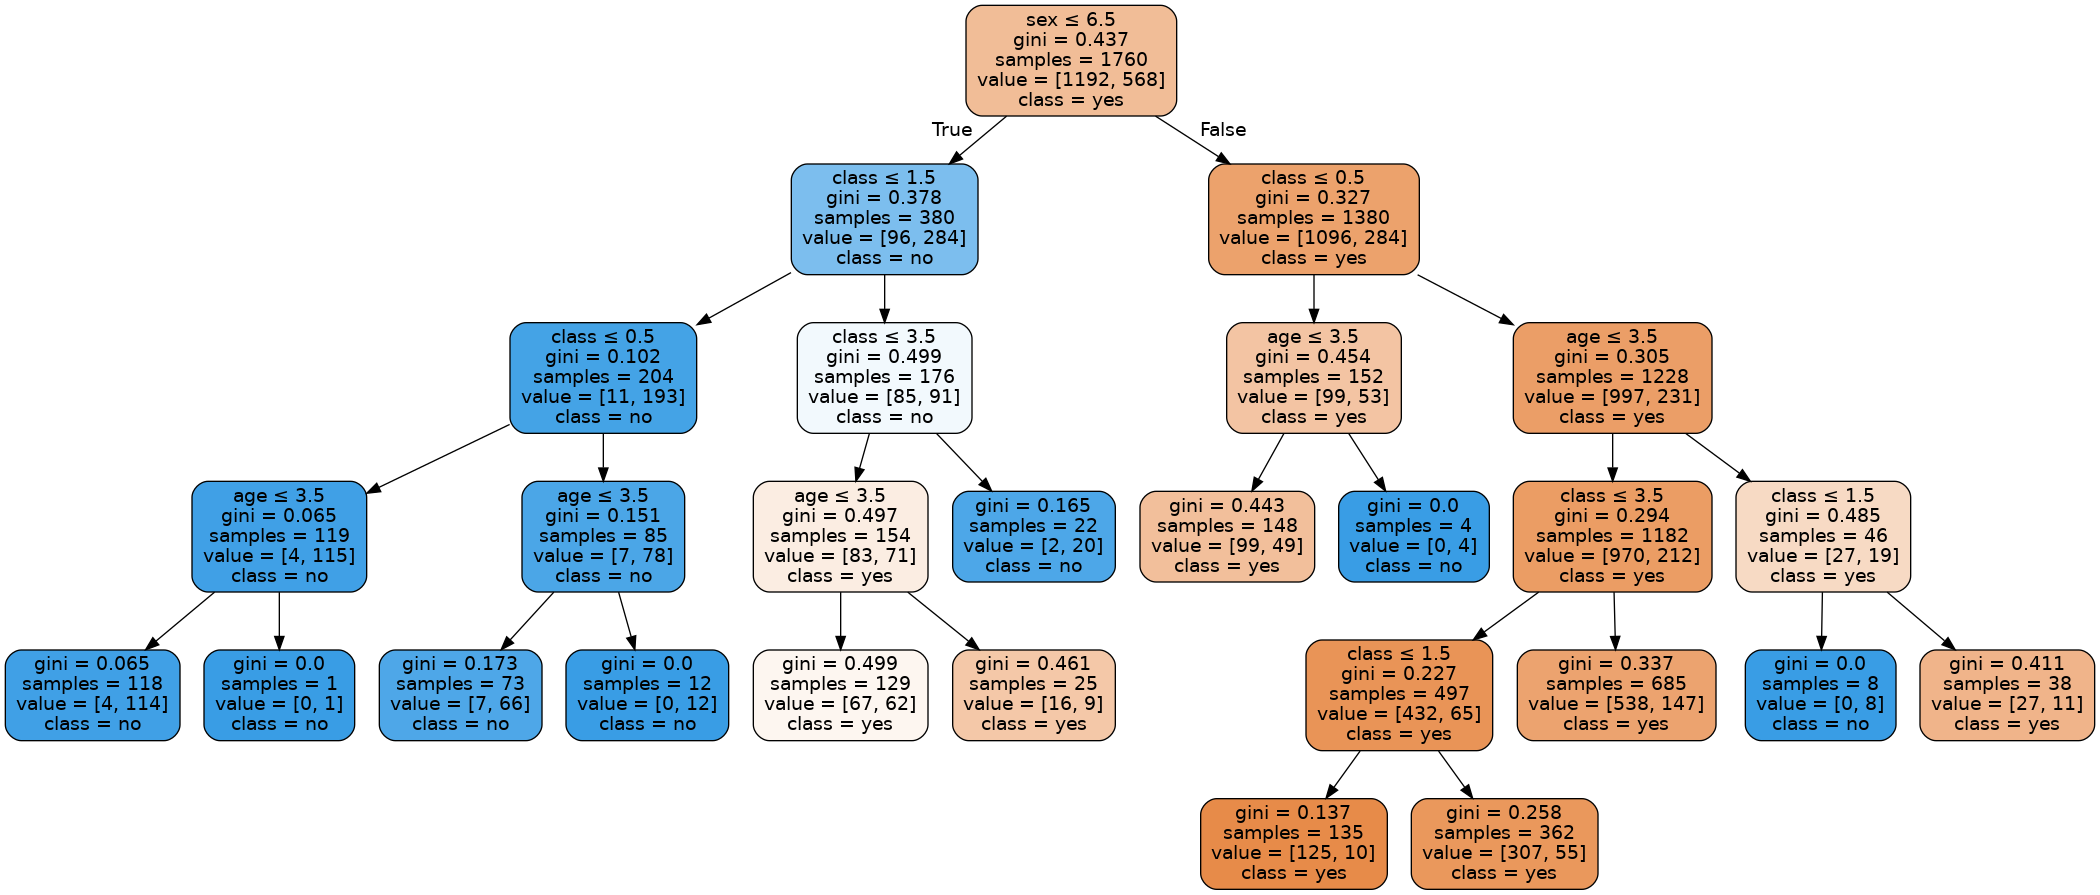

In [6]:
dot_data = StringIO()
export_graphviz(tree_CART_titanic, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names=X_train_titanic.columns.to_list(), class_names=['yes', 'no'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('./pictures/titanic_CART.png')
Image(graph.create_png())

> C4.5

True

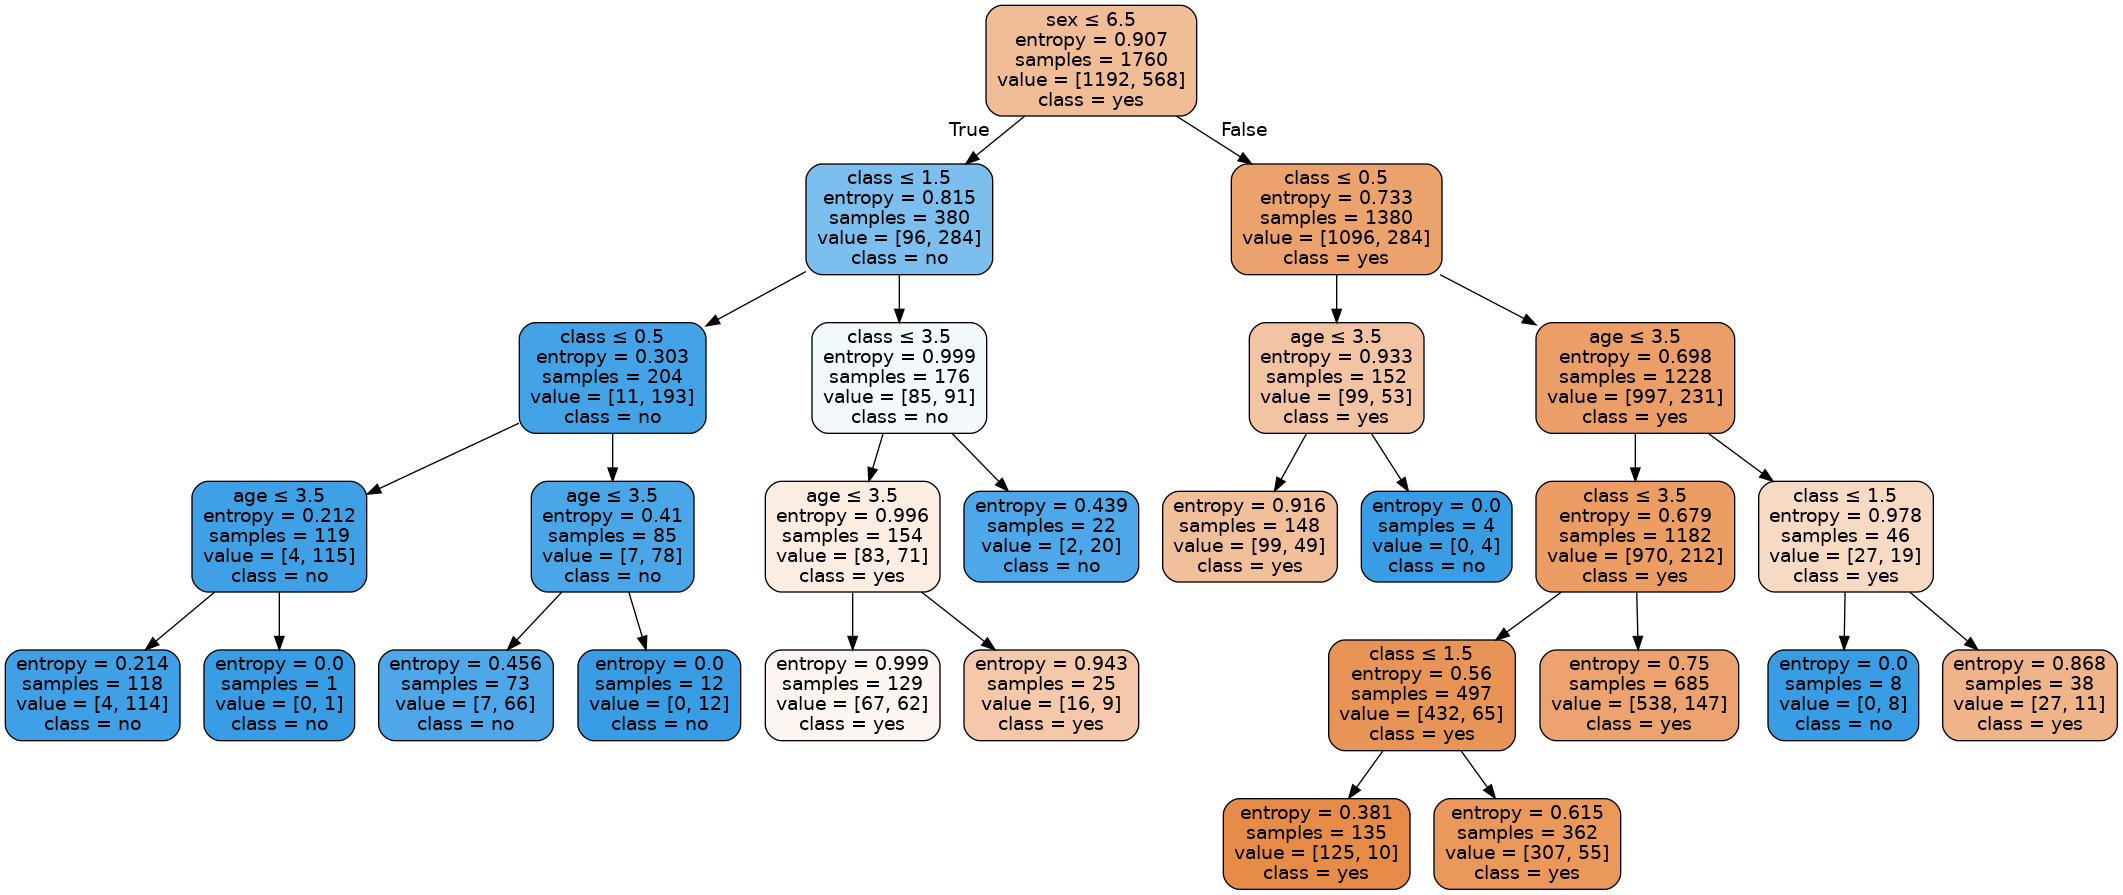

In [7]:
dot_data = StringIO()
export_graphviz(tree_C45_titanic, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names=X_train_titanic.columns.to_list(), class_names=['yes', 'no'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('./pictures/titanic_C45.png')
Image(graph.create_png())

Both trees are identitical. <br> Only changing the criterion has no influence on the final results, for this database. <br>

#### Metrics
Since both CART and C4.5 are identical, metrics are computed only once, on the CART tree.

In [8]:
def print_results(y_true, y_pred, msg=''):
    print(msg)
    accuracy = accuracy_score(y_true, y_pred)
    m = confusion_matrix(y_true, y_pred)
    TPR = (m[0,0])/(m[0,0]+m[1,0])
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(f'True Positive Rate (TPR) = {TPR}')
    print(f'Mean Absolute Error = {1-accuracy}')
    print(f"Classification Report: \n{classification_report(y_true, y_pred)}")
    print(f"Confusion Matrix: \n{m}")
    kappa_train = cohen_kappa_score(y_true, y_pred)
    print(f'kappa train = {kappa_train}\n\n')

y_pred_CART_train = tree_CART_titanic.predict(X_train_titanic)
print_results(y_train_titanic, y_pred_CART_train, '*** Training metrics ***')

y_pred_CART_test = tree_CART_titanic.predict(X_test_titanic)
print_results(y_test_titanic, y_pred_CART_test, '*** Testing metrics ***')

*** Training metrics ***
Accuracy: 0.7977272727272727
True Positive Rate (TPR) = 0.7746386333771353
Mean Absolute Error = 0.20227272727272727
Classification Report: 
              precision    recall  f1-score   support

           8       0.77      0.99      0.87      1192
           9       0.95      0.40      0.56       568

    accuracy                           0.80      1760
   macro avg       0.86      0.69      0.71      1760
weighted avg       0.83      0.80      0.77      1760

Confusion Matrix: 
[[1179   13]
 [ 343  225]]
kappa train = 0.45430729355369137


*** Testing metrics ***
Accuracy: 0.7619047619047619
True Positive Rate (TPR) = 0.7480719794344473
Mean Absolute Error = 0.23809523809523814
Classification Report: 
              precision    recall  f1-score   support

           8       0.75      0.98      0.85       298
           9       0.87      0.31      0.46       143

    accuracy                           0.76       441
   macro avg       0.81      0.65      0.6

#### Comments on the results

The test accuracy (0.73) is lower than the train accuracy (0.80). <br>
The kappa coefficient is superior to 0 for both the train and test predictions: the model is better than a random model. However, the kappa coefficient is inferior to 0.6.<br>
In the context of binary classification, the Mean Absolute Error is MAE = 1-accuracy.

#### Question 3
The same method is used for question 3.

In [9]:
df_zoo = pd.read_csv('./data/zoo.csv')
df_zoo.head(3)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish


The zoo dataframe has to be converted to string to be used with the unique() function, because it contains both bool and string values.

In [10]:
label_encoder_zoo = preprocessing.LabelEncoder()
label_encoder_zoo.fit(np.unique(df_zoo.astype(str)))
df_zoo_encoded = pd.DataFrame({x:label_encoder_zoo.transform(df_zoo[x].astype(str)) for x in df_zoo.columns.values})
df_zoo_encoded.head(3)

LabelEncoder()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,8,7,6,6,7,6,6,7,7,7,7,6,6,2,6,6,7,60
1,10,7,6,6,7,6,6,6,7,7,7,6,6,2,7,6,7,60
2,11,6,6,7,6,6,7,7,7,7,6,6,7,0,7,6,6,33


Number of training instances: 80.
Number of testing instances: 21


DecisionTreeClassifier()

True

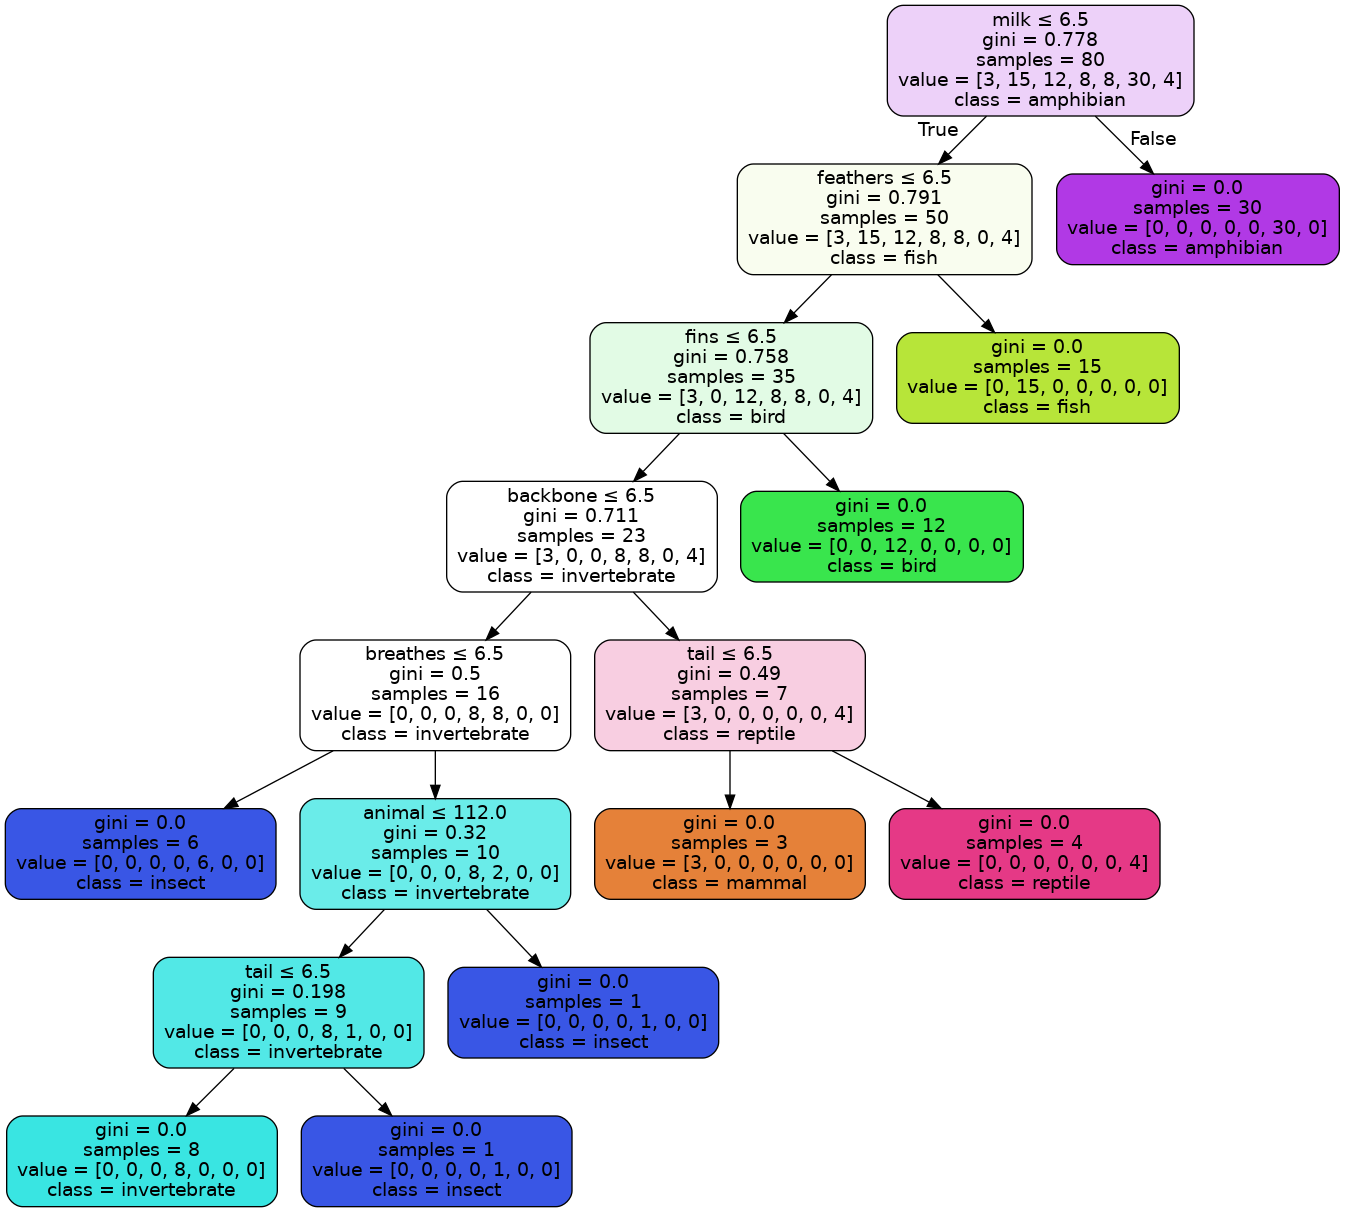

In [11]:
X_zoo = df_zoo_encoded[df_zoo_encoded.columns[:-1]]
y_zoo = df_zoo_encoded[df_zoo_encoded.columns[-1]]
X_train_zoo, X_test_zoo, y_train_zoo, y_test_zoo = train_test_split(X_zoo, y_zoo, test_size=0.2, random_state=1)
print(f'Number of training instances: {len(X_train_zoo)}.\nNumber of testing instances: {len(X_test_zoo)}')

tree_CART_zoo = DecisionTreeClassifier(criterion='gini')
tree_CART_zoo.fit(X_train_zoo, y_train_zoo)

dot_data = StringIO()
export_graphviz(tree_CART_zoo, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True, feature_names=X_train_zoo.columns.to_list(), class_names=df_zoo['type'].unique())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('./pictures/zoo_CART.png')
Image(graph.create_png())

In [12]:
y_pred_CART_train_zoo = tree_CART_zoo.predict(X_train_zoo)
print_results(y_train_zoo, y_pred_CART_train_zoo, '*** Training metrics ***')

y_pred_CART_test_zoo = tree_CART_zoo.predict(X_test_zoo)
print_results(y_test_zoo, y_pred_CART_test_zoo, '*** Testing metrics ***')

*** Training metrics ***
Accuracy: 1.0
True Positive Rate (TPR) = 1.0
Mean Absolute Error = 0.0
Classification Report: 
              precision    recall  f1-score   support

           9       1.00      1.00      1.00         3
          13       1.00      1.00      1.00        15
          33       1.00      1.00      1.00        12
          51       1.00      1.00      1.00         8
          52       1.00      1.00      1.00         8
          60       1.00      1.00      1.00        30
          84       1.00      1.00      1.00         4

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix: 
[[ 3  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  8  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  4]]
kappa train = 1.0


*** Testing metrics ***
Accuracy: 0.9047619047619048
True Positive Rate (TP

/tmp/ipykernel_9412/4014555658.py:5: RuntimeWarning: invalid value encountered in scalar divide
  TPR = (m[0,0])/(m[0,0]+m[1,0])
/home/vl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

#### Comments of results on the zoo database
Results are excellent. <br>
The testing accuracy is above 90%. <br>
The testing kappa is 0.86 > 0.6. <br>
The true positive rate was calculated with the binary classification of question 1. In the case of multi-class classification, the formula is not correct. It yields NaN because the first column of the matrix is empty (the test set does not contain the first type). <br> The True Positive Rates can be computed by just looking at the confusion matrix. We can see that is it 1 for almost all types, except type 1 for which the test set does not have any entry, type 4 and type 7.